## E-commerce Customer Analytics

In [1]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.gridspec as gridspec
import itertools
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics
import seaborn as sns

In [2]:
import os
os.getcwd()

'C:\\Users\\Anurag\\Documents'

In [4]:
df = pd.read_csv('term3.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [5]:
print(df.shape)

(10999, 12)


In [6]:
print(df.columns)

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
ID                     10999 non-null int64
Warehouse_block        10999 non-null object
Mode_of_Shipment       10999 non-null object
Customer_care_calls    10999 non-null int64
Customer_rating        10999 non-null int64
Cost_of_the_Product    10999 non-null int64
Prior_purchases        10999 non-null int64
Product_importance     10999 non-null object
Gender                 10999 non-null object
Discount_offered       10999 non-null int64
Weight_in_gms          10999 non-null int64
Reached.on.Time_Y.N    10999 non-null int64
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None


In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [9]:
df.describe(include=['object', 'bool'])

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


In [10]:
print(df['Warehouse_block'].value_counts())
print(df['Mode_of_Shipment'].value_counts())
print(df['Product_importance'].value_counts())
print(df['Gender'].value_counts())

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
F    5545
M    5454
Name: Gender, dtype: int64


In [11]:
df['Warehouse_block'].value_counts(normalize=True)

F    0.333303
D    0.166742
A    0.166652
B    0.166652
C    0.166652
Name: Warehouse_block, dtype: float64

In [12]:
df['Mode_of_Shipment'].value_counts(normalize=True)

Ship      0.678425
Flight    0.161560
Road      0.160015
Name: Mode_of_Shipment, dtype: float64

In [13]:
df['Product_importance'].value_counts(normalize=True)

low       0.481589
medium    0.432221
high      0.086190
Name: Product_importance, dtype: float64

In [14]:
df['Gender'].value_counts(normalize=True)

F    0.504137
M    0.495863
Name: Gender, dtype: float64

In [15]:
df['Reached.on.Time_Y.N'].mean()

0.5966906082371125

In [16]:
df1=df.copy()

In [17]:
clean_up= {"Warehouse_block":  {"A":1, "B":2, "C":3, "D":4, "F":5},
           "Mode_of_Shipment": {"Ship":1, "Flight":2, "Road":3},
           "Product_importance": {"low":1, "medium":2, "high":3},
           "Gender": {"F":1, "M":2}}

In [18]:
df1.replace(clean_up, inplace=True)

In [19]:
df1.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,4,2,4,2,177,3,1,1,44,1233,1
1,2,5,2,4,5,216,2,1,2,59,3088,1
2,3,1,2,2,2,183,4,1,2,48,3374,1
3,4,2,2,3,3,176,4,2,2,10,1177,1
4,5,3,2,2,2,184,3,2,1,46,2484,1


In [20]:
df1.dtypes

ID                     int64
Warehouse_block        int64
Mode_of_Shipment       int64
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

In [21]:
df1 = df1.drop("ID", axis=1)

In [23]:
df1.dtypes

Warehouse_block        int64
Mode_of_Shipment       int64
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

In [24]:
df1 = df1.rename(columns={"Reached.on.Time_Y.N": "Reached"})

In [25]:
y=df1.Reached
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8799, 11) (8799,)
(2200, 11) (2200,)


------------------create a correlation plot------------


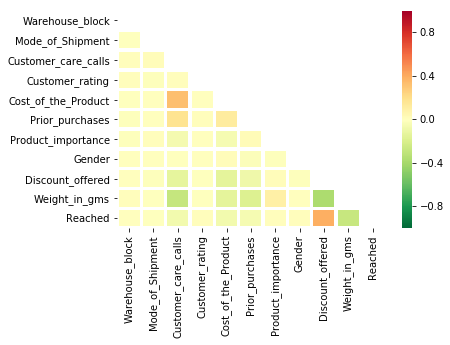

In [26]:
# Correlation matrix
corr_df=X_train.corr(method='pearson')
print("------------------create a correlation plot------------")
mask=np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] =True
seaborn.heatmap(corr_df,cmap='RdYlGn_r', vmax=1.0, vmin=-1.0, mask=mask, linewidths=2.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()



In [27]:
results_test = {}
results_train = {}
def prdict_date(algo_name,X_train,y_train,X_test,y_test,verbose=0):
    algo_name.fit(X_train, y_train)
    Y_pred = algo_name.predict(X_test)
    acc_train = round(algo_name.score(X_train, y_train) * 100, 2)
    acc_val = round(algo_name.score(X_test, y_test) * 100, 2)
    results_test[str(algo_name)[0:str(algo_name).find('(')]] = acc_val
    results_train[str(algo_name)[0:str(algo_name).find('(')]] = acc_train
    if verbose ==0:
        print("accuracy train: " + str(acc_train))
        print("accuracy test: "+ str(acc_val))
    else:
        return Y_pred

In [28]:
### helping function

def conf(algo_name,X_test, y_test):
    y_pred = algo_name.predict(X_test)
    forest_cm = metrics.confusion_matrix(y_pred, y_test, [1,0])
    sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["1", "0"] , yticklabels = ["1", "0"] )
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.title(str(algo_name)[0:str(algo_name).find('(')])

accuracy train: 100.0
accuracy test: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       876
           1       1.00      1.00      1.00      1324

   micro avg       1.00      1.00      1.00      2200
   macro avg       1.00      1.00      1.00      2200
weighted avg       1.00      1.00      1.00      2200



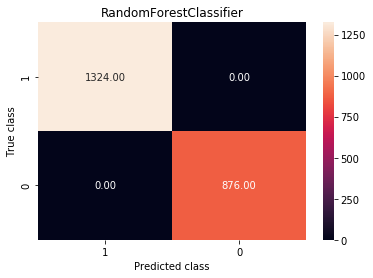

In [29]:
random_forest = RandomForestClassifier(n_estimators=75 , random_state=0  )
prdict_date(random_forest,X_train,y_train,X_test,y_test)
print(classification_report(y_test, random_forest.predict(X_test)))
conf(random_forest,X_test, y_test)

accuracy train: 100.0
accuracy test: 100.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       876
           1       1.00      1.00      1.00      1324

   micro avg       1.00      1.00      1.00      2200
   macro avg       1.00      1.00      1.00      2200
weighted avg       1.00      1.00      1.00      2200



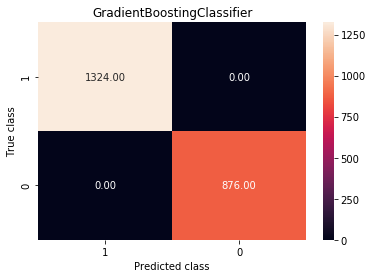

In [30]:
# Train: Gradient Boosting
gbc = GradientBoostingClassifier(loss='deviance', learning_rate=0.2, n_estimators=200 , max_depth=6)
prdict_date(gbc,X_train,y_train,X_test,y_test)

print(classification_report(y_test, gbc.predict(X_test)))
conf(gbc,X_test, y_test)